<h1 style = font-size: 100px>Notebook for "Knowledge Graph Link Prediction based on Text" by Haitz Sáez de Ocáriz Borde, 2022 </h1>

We use the same dataset used in GraphWriter
https://github.com/rikdz/GraphWriter

# SETUP

<h1> Clone Data from my Github

In [ ]:
!git clone https://github.com/haitzsaezdeocariz/kg_data.git

Cloning into 'kg_data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
!unzip kg_data/preprocessed_data.zip

Archive:  kg_data/preprocessed_data.zip
  inflating: preprocessed.test.tsv   
  inflating: preprocessed.train.tsv  
  inflating: preprocessed.val.tsv    


<h1> Import Pre-processed data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/TRAINING_SET_ALL_38720_SPECTER.zip' TRAINING_SET_ALL_38720_SPECTER.zip
!unzip TRAINING_SET_ALL_38720_SPECTER.zip

!cp '/content/gdrive/My Drive/TESTING_SET_ALL_1000_SPECTER.zip' TESTING_SET_ALL_1000_SPECTER.zip
!unzip TESTING_SET_ALL_1000_SPECTER.zip

Mounted at /content/gdrive
Archive:  TRAINING_SET_ALL_38720_SPECTER.zip
  inflating: TRAINING_SET_ALL_38720  
Archive:  TESTING_SET_ALL_1000_SPECTER.zip
  inflating: TESTING_SET_ALL_1000_SPECTER  


<h1> Installs

Note: for some reason we need to downgrade pytorch, otherwise colab will collapse (May 2022)

In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+cu113.html

     |████████████████████████████████| 7.9 MB 4.7 MB/s 


In [ ]:
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git
!pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 3.5 MB 7.3 MB/s 
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:16:48tcmalloc: large alloc 1147494400 bytes == 0x3933c000 @  0x7fdc49377615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.2 MB/s eta 0:14:55tcmalloc: large alloc 1434370048 bytes == 0x7d992000 @  0x7fdc49377615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████            | 1336.2 MB 1.2

<h1> Dataset: Description and Importing

AGENDA DATASET
1. Text Graph Pairings
2. 40k SAMPLES approx
3. Graphs are small

You can process your data to a tab-separated list with the following fields:

title, entities, entity type, graph, target, ordering

1. "title" paper title
2. "entities" is a semi-colon delimited list of entities
3. "entity type" is a space delimited list of one type token associated with each entity
4. "graph" is a semi-colon delimited list of graph triples, where the head and tail are indexes of the entities in the "entities" list and the relation is the index of the relation in the data/relations.vocab file. <head, relation, tail> triples divided by ';'
5. "target" is your target text with entities replaced by placeholders indicating the entity type and its index in the "entities" list
6. "ordering" is not used, but you may need to put a placeholder there to get the code to work as is. Alternately, you can modify the code to ignore this field

In [ ]:
import csv
tsv_file = open("preprocessed.train.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

title, entities, entity_type, graph, target, ordering = [],[],[],[],[],[]
for row in read_tsv:
  title.append(row[0])
  entities.append(row[1])
  entity_type.append(row[2])
  graph.append(row[3])
  target.append(row[4])
  ordering.append(row[5])

<h1> View data <h1>

In this cells we visualize the different columns of the tsv file for a given sample

In [ ]:
title[200]

'On the potential for artificial bandwidth extension of bone and tissue conducted speech : a mutual information study .'

In [ ]:
entities[200]

'low and high-band frequency ranges ; bone and tissue conducted speech ; gaussian mixture model approach ; hearing protection devices ; occluded ear canal ; bandwidth extension techniques ; occluded ear ; mutual information ; radio communication ; speech capture ; microphone signals ; extended bandwidth ; speech signal ; signal-to-noise ratio ; speech'

In [ ]:
entity_type[200]

'<otherscientificterm> <material> <method> <method> <otherscientificterm> <method> <otherscientificterm> <otherscientificterm> <task> <material> <otherscientificterm> <material> <material> <metric> <material>'

In [ ]:
graph[200]

'11 2 12 ; 3 1 8 ; 11 1 13 ; 0 0 10'

In [ ]:
target[200]

'to enhance the communication experience of workers equipped with <method_3> and <task_8> in noisy environments , alternative methods of <material_9> have been utilized . one such approach uses <material_14> captured by a microphone in an <otherscientificterm_4> . although high in <metric_13> , <material_1> has a limited bandwidth with a high frequency roll-off at 2 khz . in this paper , the potential of using various <method_5> is investigated by studying the <otherscientificterm_7> between the signals of three uniquely placed microphones : inside an <otherscientificterm_6> , outside the ear and in front of the mouth . using a <method_2> , the <otherscientificterm_7> of the <otherscientificterm_0> of the three <otherscientificterm_10> at varied levels of <metric_13> is measured . results show that a <material_12> with <material_11> and high <metric_13> may be achieved using the available <otherscientificterm_10> .'

In [ ]:
ordering[200]

'3 8 9 17 15 -1 14 4 15 -1 13 1 15 -1 5 7 6 15 -1 2 19 15 -1 0 10 16 18 15 -1'

<h1> Recover abstract from target (We predict the KG based on the abstract and the node entities)

Recover the abstract based on the different columns in the tsv file

In [ ]:
import re

In [ ]:
abstract=[]
for row in range(38720):
  split_text = re.split('<|>',target[row])
  abstract_temporal=''
  for i in split_text:
    if i[0:6] == 'method':
      try:
        index=int(i[7:])
        abstract_temporal += re.split(';',entities[row])[index]
      except:
        abstract_temporal += i
    elif i[0:6] == 'metric':
      try:
        index=int(i[7:])
        abstract_temporal += re.split(';',entities[row])[index]
      except:
        abstract_temporal += i
    elif i[0:4] == 'task':
      try:
        index=int(i[5:])
        abstract_temporal += re.split(';',entities[row])[index]
      except:
        abstract_temporal += i
    elif i[0:len('otherscientificterm')] == 'otherscientificterm':
      try:
        index=int(i[len('otherscientificterm')+1:])
        abstract_temporal += re.split(';',entities[row])[index]
      except:
        abstract_temporal += i
    elif i[0:len('material')] == 'material':
      try:
        index=int(i[len('material')+1:])
        abstract_temporal += re.split(';',entities[row])[index]
      except:
        abstract_temporal += i
    else:
      abstract_temporal += i
  abstract.append(abstract_temporal)

In [ ]:
abstract[0]

'this paper describes the  constrained minimization approach  to combine multiple  classifiers  in order to improve  classification accuracy  . since errors of individual  classifiers  in the  ensemble  should somehow be uncorrelated to yield higher  classification accuracy  , we propose a  combination strategy  where the combined  classifier accuracy  is a function of the correlation between classification errors of the individual  classifiers  . to obtain powerful single  classifiers  , different techniques are investigated including  support vector machines  and latent semantic indexing matrix  , which is a popular  vector-space model  . we also investigate  discrimina-tive training  of the  lsi matrix  on  constrained minimization approach  .  discrimina-tive training  minimizes the  classification error  by increasing the  score separation  of the correct from competing documents . experimental evaluation is carried out on a  banking call routing  and on  switchboard databases  wi

<h1> Vectorize Text

We need to find a way to vectorize the text:
1. The node entities (which may contain multiple words)
2. The abstracts

<h1> Tokenizing with Transformers

In [ ]:
!pip install -U sentence-transformers

Link to pretrained models

https://www.sbert.net/docs/pretrained_models.html

We initially tested using Doc2Vec and also, sentence-level transformers. In the end, we used the SPECTER transformer.

In [ ]:
from sentence_transformers import SentenceTransformer

# We are using "paraphrase-MiniLM-L6-v2" model here, You can find list of model [here][2]
# all-mpnet-base-v2
# allenai-specter
model = SentenceTransformer('allenai-specter')
embedding=768

<h1> Create Graph Class with all necessary data

Here we create a few helper functions and a Graph class which contains all the information we will later need for training our Knowledge Graph link predictor.

Note that part of the code is commented for further pre-processing of all the data.

In [ ]:
import numpy as np
import torch
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
from gensim.models.doc2vec import Doc2Vec
from scipy.sparse import csr_matrix

def A_to_onehot(A,edge_index):
  A_onehot = np.zeros((edge_index.shape[-1],7))
  count=0
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      if A[i,j]>0:
        A_onehot[count,int(A[i,j])-1]=1
        count+=1
  return A_onehot

def get_fully_connected(nodes):
  edge_index,_=from_scipy_sparse_matrix(csr_matrix(np.ones((len(nodes),len(nodes)))))
  return torch.Tensor(edge_index.float()).type(torch.int64).cuda()

def from_scipy_sparse_matrix(A):
    r"""Converts a scipy sparse matrix to edge indices and edge attributes.

    Args:
        A (scipy.sparse): A sparse matrix.
    """
    A = A.tocoo()
    row = torch.from_numpy(A.row).to(torch.long)
    col = torch.from_numpy(A.col).to(torch.long)
    edge_index = torch.stack([row, col], dim=0).cuda()
    edge_weight = torch.from_numpy(A.data)
    return edge_index, edge_weight

def vectorize_nodes(nodes,attach_abstract,vectorized_abstract):
        for i in range(len(nodes)):
          if attach_abstract:
            if i ==0:
              node_vector=model.encode([nodes[i].lower()])
              node_vector= np.concatenate((node_vector,vectorized_abstract),axis=1)
            else:
              node_vector=np.concatenate(
                  (node_vector,
                  
                  np.concatenate((
                  model.encode([nodes[i].lower()]),vectorized_abstract),axis=1)

                  ),axis=0
              )
          else:
            if i ==0:
              node_vector=model.encode([nodes[i].lower()])
            else:
              node_vector=np.concatenate(
                  (node_vector,
                  model.encode([nodes[i].lower()])
                  ),axis=0
              )  
        return node_vector


def flatten_onehot(A_one_hot):
  flattened_vector = A_one_hot[0,0,:][None,:]
  first_pass = True
  for i in range(A_one_hot.shape[0]):
    for j in range(A_one_hot.shape[1]):
      if first_pass==False:
        flattened_vector=torch.cat((flattened_vector,A_one_hot[i,j,:][None,:]),axis=0)
      first_pass = False
  return flattened_vector

class Graph(object):
    def __init__(self,
                 nodes,
                 node_type,
                 A,
                 A_attr,
                 edge_attr,
                 abstract,
                 target,
                 title,
                 attach_abstract=False
                 ):
        """ Graph structure 
            for a mini-batch it will store a big (sparse) graph 
            representing the entire batch
        Args:
            x: node features  [num_nodes x num_feats]
            y: graph labels   [num_graphs]
            edge_index: list of edges [2 x num_edges]
        """
        #Nodes -> List of strings containing each entity
        self.nodes = nodes
        #Node type -> List of strings based on entity type
        # self.node_type = node_type
        #Adjacency matrix -> numpy matrix
        # self.A = csr_matrix(A)
        #Adjacency matrix with attributes -> numpy matrix
        # self.A_attr = A_attr
        
        # self.A_onehot_no_flatten=torch.Tensor(A_to_onehot(A_attr)).cuda()
        self.edge_index, _ = from_scipy_sparse_matrix(csr_matrix(A_attr))
        self.A_onehot = torch.Tensor(A_to_onehot(A_attr,self.edge_index)).cuda()
        #Edge attribute -> list of lists with edge type (relation) and i,j indeces
        # self.edge_attr = edge_attr
        #Abstract corresponding to the graph -> string
        # self.abstract = abstract
        #Original abstract without substituting node entities -> string
        # self.target = target
        #Title -> Paper title (useless) -> string
        # self.title = title

        #Vectorized graph information
        self.vectorized_abstract=model.encode([abstract.lower()])
        #self.relations = ["USED-FOR","CONJUNCTION","FEATURE-OF","PART-OF","COMPARE","EVALUATE-FOR","HYPONYM-OF"]
        #Whether to attach abstract vectorization to node features
        self.attach_abstract = attach_abstract

        #Node features x
        self.x = torch.Tensor(vectorize_nodes(self.nodes,self.attach_abstract,self.vectorized_abstract)).cuda()
        #Fully connected A matrix for GAT
        # self.fully_connected = get_fully_connected(self.nodes)
        #Retrive number of nodes in the graph
        self.num_nodes = int(self.x.shape[0]) 

    def set_batch(self, batch): #useful for batching
        self.batch = batch   

    def get_triples(self):
        for index in range(len(self.edge_attr)):
          
          print(self.nodes[self.edge_attr[index][1]]+' -> '+self.relations[self.edge_attr[index][0]]+' -> '+self.nodes[self.edge_attr[index][2]])

attach_abstract = True for attaching vectorized abstract embeddings

In [ ]:
attach_abstract=True

We store all the training data in a list of Graphs. One Graph for each data point.

Uncomment to preprocess data (I am loading it from my google drive instead)

In [ ]:

# from inspect import Traceback
# TRAINING_SET_ALL = []

# from tqdm import tqdm



# for row in tqdm(range(38720)): #training data has 38720 samples
#   matrix_size = len(re.split(';',entities[row]))
#   A = np.zeros((matrix_size,matrix_size))
#   A_attr = np.zeros((matrix_size,matrix_size))
#   graph_row=re.split(';',graph[row])
#   edge_attr = []
#   for entries in range(len(graph_row)):
#     i = graph_row[entries].split()[0]
#     j = graph_row[entries].split()[-1]
#     A_attr[int(i),int(j)]=int(graph_row[entries].split()[1])+1
#     A[int(i),int(j)]=1
#     # First entry is the attribute, other are i and j (edge indexes)
#     edge_attr.append([int(graph_row[entries].split()[1]),int(graph_row[entries].split()[0]),int(graph_row[entries].split()[-1])])

#   TRAINING_SET_ALL.append(Graph(
#       nodes = re.split(';',entities[row]),
#       node_type = entity_type[row],
#       A=A,
#       A_attr = A_attr,
#       edge_attr = edge_attr,
#       abstract = abstract[row],
#       target = target[row],
#       title = title[row],
#       attach_abstract=attach_abstract
#   ))

Load already preprocessed data

In [ ]:
import pickle
with open("TRAINING_SET_ALL_38720", "rb") as fp:   # Unpickling
  TRAINING_SET= pickle.load(fp)
with open("TESTING_SET_ALL_1000_SPECTER", "rb") as fp:   # Unpickling
  TESTING_SET= pickle.load(fp)

Get Loss weightings

In [ ]:
import numpy as np
# class_weights = np.load('kg_data/class_weights_20k.npy')
from sklearn.utils.class_weight import compute_class_weight
y_cw = []
for row in range(len(TRAINING_SET)):
  for i in range(TRAINING_SET[row].A_onehot.shape[0]):
    y_cw.append(np.argmax(np.array(TRAINING_SET[row].A_onehot[i,:].cpu().detach())))
y_cw = np.array(y_cw)
class_weights = compute_class_weight(
    class_weight = "balanced",
    classes = np.arange(7),
    y =y_cw)
del y_cw
print(class_weights)

[0.24999234 0.72549426 4.17180842 6.25504728 3.88323021 2.27408715
 1.90593366]


# EXPERIMENTATION

In [ ]:
#Imports (note that some are unnecessary)
from torch.nn import Linear
from torch.nn import BatchNorm1d
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GATConv
from torch_geometric.nn import GraphConv
from torch_geometric.nn import GraphNorm
from torch_geometric.nn import GATv2Conv, GatedGraphConv, ResGatedGraphConv, TransformerConv, GeneralConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import MessagePassing
import torch.nn as nn
pdist = nn.PairwiseDistance(p=2)
from torch.nn import Linear, ELU, BatchNorm1d, Module, Sequential, Softmax, PReLU
from torch_scatter import scatter
from torch_scatter import scatter_mean
from sklearn.metrics import precision_recall_fscore_support as score
import pandas
import random
import warnings
warnings.filterwarnings("ignore")


<h1> Code GNN (Code for a lot of different models)

Code last layer for link prediction. We use as template MessagePassing. We take the node features from each node and pass them through a MLP (psi(h_i,h_j)) with output layer with 8 nodes (one for each possible link class) and a softmax activation. Node that the graph is fully-connected, so we calculate link_ij for every node combination possible.

In [ ]:
class link_prediction_layer(MessagePassing):
    # Note that we take as template MessagePassing.
    # In practice, we do not really use aggregate and update, we simply pass the data through the functions
    def __init__(self,graph_embeddings=20):
        super().__init__()


        # MLP `\psi` for computing messages `link_ij`
        # dims: 2d -> 8 (combining feature from 2 nodes, obtain PMF over the 8 link classes) 
        self.mlp_link = Sequential(
            Linear(graph_embeddings*2,graph_embeddings), BatchNorm1d(graph_embeddings), ELU(),
            Linear(graph_embeddings,graph_embeddings), BatchNorm1d(graph_embeddings), ELU(),
            Linear(graph_embeddings,graph_embeddings), BatchNorm1d(graph_embeddings), ELU(),
            Linear(graph_embeddings,graph_embeddings), BatchNorm1d(graph_embeddings), ELU(),
            Linear(graph_embeddings,graph_embeddings), BatchNorm1d(graph_embeddings), ELU(),
            Linear(graph_embeddings, 7), Softmax(),
          )

    def forward(self, h, edge_index):
        """
        Args:
            h: (n, d) - initial node features
            edge_index: (e, 2) - pairs of edges (i, j)

        Returns:
            link_ij: (n**2, 8), fully-connected graph so n**2
        """
        out = self.propagate(edge_index=edge_index, h=h)
        return out

    def message(self, h_i, h_j):
        """
        Args:
            h_i: (e, d) - destination node features
            h_j: (e, d) - source node features
        Returns:
            link_ij: (n**2, 8) - messages `msg_ij` passed through MLP `\psi`
        """
        msg = torch.cat([h_i, h_j], dim=-1)
        return self.mlp_link(msg)
    
    def aggregate(self, inputs):
        return inputs
    
    def update(self,inputs):
        return inputs

In [ ]:
class LINK_PREDICTOR(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATConv(embedding,embedding,heads=self.heads)
        self.l2 = GATConv(embedding,embedding,heads=self.heads)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR_3layers(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR_3layers, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATConv(embedding,embedding,heads=self.heads)
        self.l2 = GATConv(embedding,embedding,heads=self.heads)
        self.l3 = GATConv(embedding,embedding,heads=self.heads)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x1 = self.ELU(self.l3(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR2(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR2, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.l2 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR2_noabstract(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR2_noabstract, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.l2 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=embedding)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        # x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        # x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x1,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR2_3layers(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR2_3layers, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.l2 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.l3 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x1 = self.ELU(self.l3(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR3(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR3, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = SAGEConv(embedding,embedding)
        self.l2 = SAGEConv(embedding,embedding)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR3_3layers(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR3_3layers, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = SAGEConv(embedding,embedding)
        self.l2 = SAGEConv(embedding,embedding)
        self.l3 = SAGEConv(embedding,embedding)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x1 = self.ELU(self.l3(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR4(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR4, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = TransformerConv(embedding,embedding)
        self.l2 = TransformerConv(embedding,embedding)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR4_3layers(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR4_3layers, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = TransformerConv(embedding,embedding)
        self.l2 = TransformerConv(embedding,embedding)
        self.l3 = TransformerConv(embedding,embedding)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x1 = self.ELU(self.l3(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
from torch_geometric.nn import HypergraphConv,PNAConv

In [ ]:
class link_prediction_layer_inter(MessagePassing):
    # Note that we take as template MessagePassing.
    # In practice, we do not really use aggregate and update, we simply pass the data through the functions
    def __init__(self,graph_embeddings=20):
        super().__init__()


        # MLP `\psi` for computing messages `link_ij`
        # dims: 2d -> 8 (combining feature from 2 nodes, obtain PMF over the 8 link classes) 
        self.mlp_link = Sequential(
            Linear(graph_embeddings*2,100), BatchNorm1d(100), ELU(),
            Linear(100,100), BatchNorm1d(100), ELU(),
          )

    def forward(self, h, edge_index):
        """
        Args:
            h: (n, d) - initial node features
            edge_index: (e, 2) - pairs of edges (i, j)

        Returns:
            link_ij: (n**2, 8), fully-connected graph so n**2
        """
        out = self.propagate(edge_index=edge_index, h=h)
        return out

    def message(self, h_i, h_j):
        """
        Args:
            h_i: (e, d) - destination node features
            h_j: (e, d) - source node features
        Returns:
            link_ij: (n**2, 8) - messages `msg_ij` passed through MLP `\psi`
        """
        msg = torch.cat([h_i, h_j], dim=-1)
        return self.mlp_link(msg)
    
    def aggregate(self, inputs):
        return inputs
    
    def update(self,inputs):
        return inputs

In [ ]:
class LINK_PREDICTOR6(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR6, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        # self.list_ag= ["sum", "mean", "min", "max", "var", "std"]
        # self.lis_sc = ["identity", "amplification", "attenuation", "linear","inverse_linear"]
        self.list_ag= ["mean"]
        self.lis_sc = ["identity"]
        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = PNAConv(embedding,embedding,self.list_ag,self.lis_sc,torch.Tensor([2]))
        self.l2 = PNAConv(embedding,embedding,self.list_ag,self.lis_sc,torch.Tensor([2]))
        self.link_prediction_layer_out = link_prediction_layer(graph_embeddings=self.hidden_channels)
        
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)     
        out = self.link_prediction_layer_out(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR6_noabstract(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR6_noabstract, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        # self.list_ag= ["sum", "mean", "min", "max", "var", "std"]
        # self.lis_sc = ["identity", "amplification", "attenuation", "linear","inverse_linear"]
        self.list_ag= ["mean"]
        self.lis_sc = ["identity"]
        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = PNAConv(embedding,embedding,self.list_ag,self.lis_sc,torch.Tensor([2]))
        self.l2 = PNAConv(embedding,embedding,self.list_ag,self.lis_sc,torch.Tensor([2]))
        self.link_prediction_layer_out = link_prediction_layer(graph_embeddings=embedding)
        
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        # x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        # x3 = torch.cat((x1,x2),-1)     
        out = self.link_prediction_layer_out(x1,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR5(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR5, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = HypergraphConv(embedding,embedding)
        self.l2 = HypergraphConv(embedding,embedding)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        
        return out

In [ ]:
class LINK_PREDICTOR2_1layers(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR2_1layers, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATv2Conv(embedding,embedding,heads=self.heads)

        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.ELU(self.l1(x1,edge_index))

        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR2_v2(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR2_v2, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        self.l1 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.l2 = GATv2Conv(embedding,embedding,heads=self.heads)
        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
        self.l_x1 = Sequential(
            Linear(embedding,embedding), ELU(),
          )
        self.l_x2 = Sequential(
            Linear(embedding,embedding), ELU(),
          )
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        x1 = self.l_x1(x[:,0:embedding])
        x2 = self.l_x2(x[:,embedding:])
        x1 = self.ELU(self.l1(x1,edge_index))
        x1 = self.ELU(self.l2(x1,edge_index))
        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

In [ ]:
class LINK_PREDICTOR_agnostic(torch.nn.Module):
    def __init__(self,heads=1):
        super(LINK_PREDICTOR_agnostic, self).__init__()
        if attach_abstract:
          self.hidden_channels = embedding*2
        else:
          self.hidden_channels = embedding

        self.graph_embeddings = 20
        self.heads = heads
        self.attention_channels = self.hidden_channels
        # self.l1 = GATv2Conv(embedding,embedding,heads=self.heads)

        self.link_prediction_layer = link_prediction_layer(graph_embeddings=self.hidden_channels)
        self.ELU = ELU()
    def forward(self,x,edge_index):
        x1 = x[:,0:embedding]
        x2 = x[:,embedding:]
        # x1 = self.ELU(self.l1(x1,edge_index))

        x3 = torch.cat((x1,x2),-1)    
        out = self.link_prediction_layer(x3,edge_index)
        return out

<h1> Evaluation functions

Graph_batch data class for batch training

In [ ]:
class Graph_batch(object):
    def __init__(self,
                 edge_index,
                 x,
                 y
                 ):
      self.edge_index = edge_index
      self.x = x
      self.y = y

    def set_batch(self, batch): #useful for batching
      self.batch = batch 

Mini-batch function to parallelize computation

In [ ]:
def create_mini_batch(graph_list):
    """ Built a sparse graph from a batch of graphs
    Args:
        graph_list: list of Graph objects in a batch
    Returns:
        a big (sparse) Graph representing the entire batch
    """
    #insert first graph into the structure
    batch_edge_index = graph_list[0].edge_index #Note that we are working with a fully-connected graph
    batch_x = graph_list[0].x #Node features
    batch_y = graph_list[0].A_onehot

    batch_batch = torch.zeros((graph_list[0].num_nodes), dtype=torch.int64)
    num_nodes_added= graph_list[0].num_nodes

    #append the rest of the graphs to the structure
    for idx, graph in enumerate(graph_list[1:]):
        # concat the features
        batch_x = torch.cat((batch_x,graph.x))
        # concat the labels
        batch_y = torch.cat((batch_y,graph.A_onehot))

        # concat the adjacency matrix as a block diagonal matrix
        batch_edge_index = torch.cat((batch_edge_index, torch.add(graph.edge_index, num_nodes_added)), dim=1)
        num_nodes_added += graph.num_nodes
        batch_batch = torch.cat((batch_batch, torch.full((graph.num_nodes,), idx + 1)))
 
    batch_graph = Graph_batch(batch_edge_index, batch_x, batch_y)
    #attach the index array to the Graph structure
    batch_graph.set_batch(batch_batch)
    return batch_graph

We will also use the F-measure to evaluate the model

1. Precision = TruePositives / (TruePositives + FalsePositives)
2. Recall = TruePositives / (TruePositives + FalseNegatives)
3. F-Measure = (2 * Precision * Recall) / (Precision + Recall)


In [ ]:
def prediction_2_onehot(a):
  return (a == a.max(axis=1)[:,None]).astype(int)

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
def print_fscore(start=0,end=1000,test=True):
  if test==True:
    mini_batch = create_mini_batch(TESTING_SET[start:end])
  else:
    mini_batch = create_mini_batch(TRAINING_SET[start:end])

  precision, recall, fscore, support = score(
    prediction_2_onehot(
    predictor(
        mini_batch.x,
        mini_batch.edge_index.cuda()
    ).cpu().detach().numpy())
    ,
    mini_batch.y.cpu().detach().numpy()
    )
  store_fscore.append(fscore)
  store_precision.append(precision)
  store_recall.append(recall)
  
  data = {'RELATION TYPE': ["USED-FOR","CONJUNCTION","FEATURE-OF","PART-OF","COMPARE","EVALUATE-FOR","HYPONYM-OF"], 'F-SCORE': fscore}
  df = pandas.DataFrame(data=data)
  print(df)
  print('AVERGA FSCORE: ',np.mean(fscore))

Code to predict fscore of guessing majority class all the time

Link to blog on how to deal with imbalanced classification data

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

<h1> Training

Code Cross Entropy function for Link prediction

In [ ]:
criterion = torch.nn.CrossEntropyLoss(weight=torch.Tensor(class_weights),reduction='mean').cuda()

Training loop

In [ ]:
#Initialize predictor
predictor = LINK_PREDICTOR_agnostic().cuda()
#Use cuda (note that all other tensors have already been moved to cuda in previous cells)
predictor.cuda()
predictor.train()

LINK_PREDICTOR_agnostic(
  (link_prediction_layer): link_prediction_layer()
  (ELU): ELU(alpha=1.0)
)

In [1]:
store_loss=[]
store_fscore=[]
store_precision=[]
store_recall=[]
#Initialize optimizer
optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4) #learning rate is define here
#Define mini batch
mini_batch_size=100
#Define number of epochs
n_epochs=50


#Loop over number of epochs
weighting=0.00
for epochs in range(n_epochs):
  #Cumulative loss over the whole training set
  cum_loss = 0
  # Iterate over the whole training set
  for i in range(int(len(TRAINING_SET)/mini_batch_size)):
    #Create mini batch, randomly select some samples from the list
    mini_batch = create_mini_batch(random.sample(TRAINING_SET, mini_batch_size))
    #Compute loss based on Graphs in the minibatch
    loss = criterion(    
        predictor(
    mini_batch.x, #x features
    mini_batch.edge_index.cuda() #edge_index (note that graph-wise everything is fully-connected, but when we create a big batch from the different graph in the minibatch this is not the case anymore)
    )
        ,
    mini_batch.y) #y is the target, it has a list with the A_onehot for each graph in the minibatch
    cum_loss += loss.item() #This is just to keep track of the loss
    loss.backward() #backpropagate
    optimizer.step() #update model parameters
    optimizer.zero_grad()
  if (epochs+1) % 1 ==0: #Print cumulative loss for the whole training set
    print(f'MEAN LOSS FOR EPOCH {epochs+1}:',cum_loss)
    store_loss.append(cum_loss)
  if (epochs+1) % 1 ==0:
    print('Test----')
    print_fscore(start=0,end=1000,test=True)
    print('Train---')
    print_fscore(start=0,end=100,test=False)
    print('------------------------')

<h1> Code Used for some of the plots

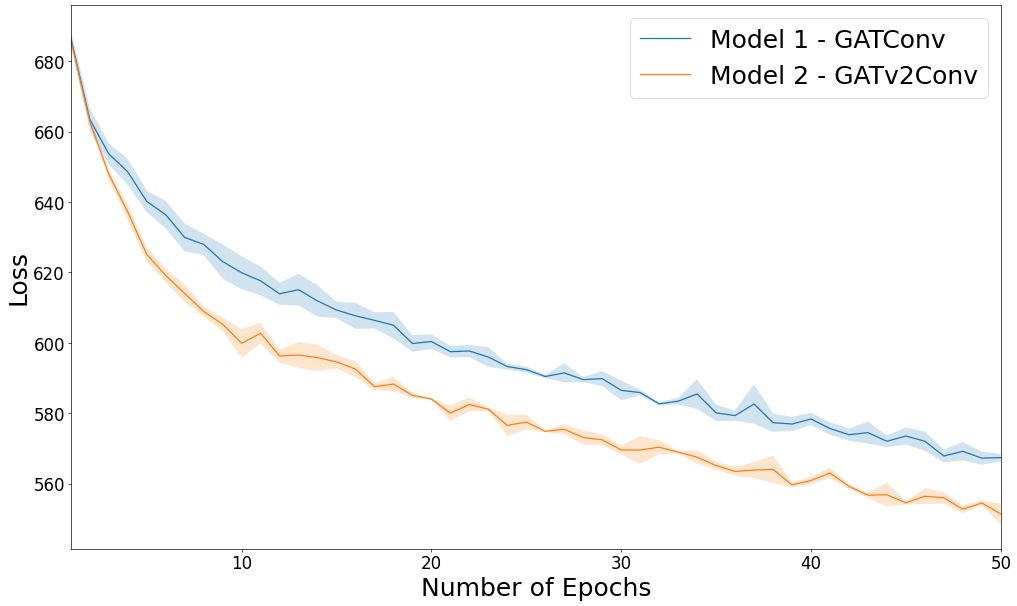

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 12), dpi=60)
ax.plot(x,mean_gat,label='Model 1 - GATConv')
ax.plot(x,mean_gatv2,label='Model 2 - GATv2Conv')
ax.fill_between(x, (np.array(mean_gat)-np.array(std_gat)), (np.array(mean_gat)+np.array(std_gat)), alpha=.2)
ax.fill_between(x, (np.array(mean_gatv2)-np.array(std_gatv2)), (np.array(mean_gatv2)+np.array(std_gatv2)), alpha=.2)
plt.xlabel('Number of Epochs', fontsize=30)
plt.ylabel('Loss', fontsize=30)
plt.legend(loc='upper right',fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim([1, 50])
plt.savefig('loss_gat.pdf')

In [ ]:
fscore_1 = []
fscore_2 = []
fscore_3 = []
fscore_4 = []
fscore_5 = []
fscore_6 = []
fscore_7 = []
fscore_avg = []

for i in range(len(store_fscore)):
  fscore_1.append(store_fscore[i][0])
  fscore_2.append(store_fscore[i][1])
  fscore_3.append(store_fscore[i][2])
  fscore_4.append(store_fscore[i][3])
  fscore_5.append(store_fscore[i][4])
  fscore_6.append(store_fscore[i][5])
  fscore_7.append(store_fscore[i][6])
  fscore_avg.append(
      (store_fscore[i][0]+store_fscore[i][1]+store_fscore[i][2]+store_fscore[i][3]+store_fscore[i][4]+store_fscore[i][5]+store_fscore[i][6])*(1/7)
  )


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
["USED-FOR","CONJUNCTION","FEATURE-OF","PART-OF","COMPARE","EVALUATE-FOR","HYPONYM-OF"]

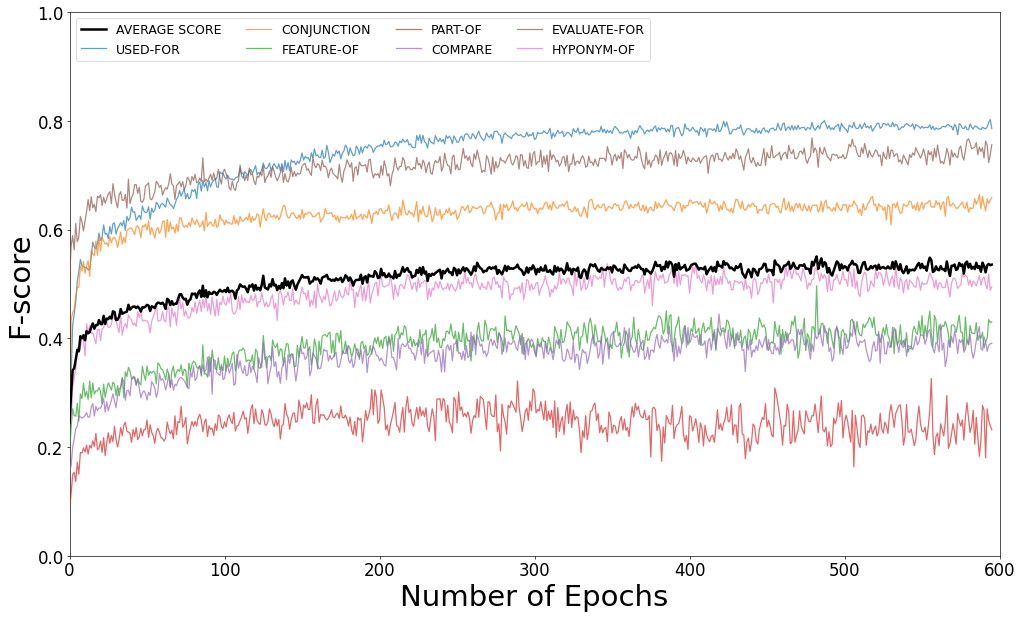

In [ ]:
plt.figure(figsize=(20, 12), dpi=60)
plt.plot(fscore_avg,label='AVERAGE SCORE',color='black',linewidth=3,zorder=8)
plt.plot(fscore_1,label='USED-FOR',alpha=0.7,zorder=1)
plt.plot(fscore_2,label='CONJUNCTION',alpha=0.7,zorder=2)
plt.plot(fscore_3,label='FEATURE-OF',alpha=0.7,zorder=3)
plt.plot(fscore_4,label='PART-OF',alpha=0.7,zorder=4)
plt.plot(fscore_5,label='COMPARE',alpha=0.7,zorder=5)
plt.plot(fscore_6,label='EVALUATE-FOR',alpha=0.7,zorder=6)
plt.plot(fscore_7,label='HYPONYM-OF',alpha=0.7,zorder=7)

plt.legend(ncol=4,loc='upper left',fontsize=15)
plt.xlim([0, 600])
plt.ylim([0, 1])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Number of Epochs', fontsize=35)
plt.ylabel('F-score', fontsize=35)
plt.savefig('fscore.pdf')

In [ ]:
precision_1 = []
precision_2 = []
precision_3 = []
precision_4 = []
precision_5 = []
precision_6 = []
precision_7 = []
precision_avg = []

for i in range(len(store_precision)):
  precision_1.append(store_precision[i][0])
  precision_2.append(store_precision[i][1])
  precision_3.append(store_precision[i][2])
  precision_4.append(store_precision[i][3])
  precision_5.append(store_precision[i][4])
  precision_6.append(store_precision[i][5])
  precision_7.append(store_precision[i][6])
  precision_avg.append(
      (store_precision[i][0]+store_precision[i][1]+store_precision[i][2]+store_precision[i][3]+store_precision[i][4]+store_precision[i][5]+store_precision[i][6])*(1/7)
  )


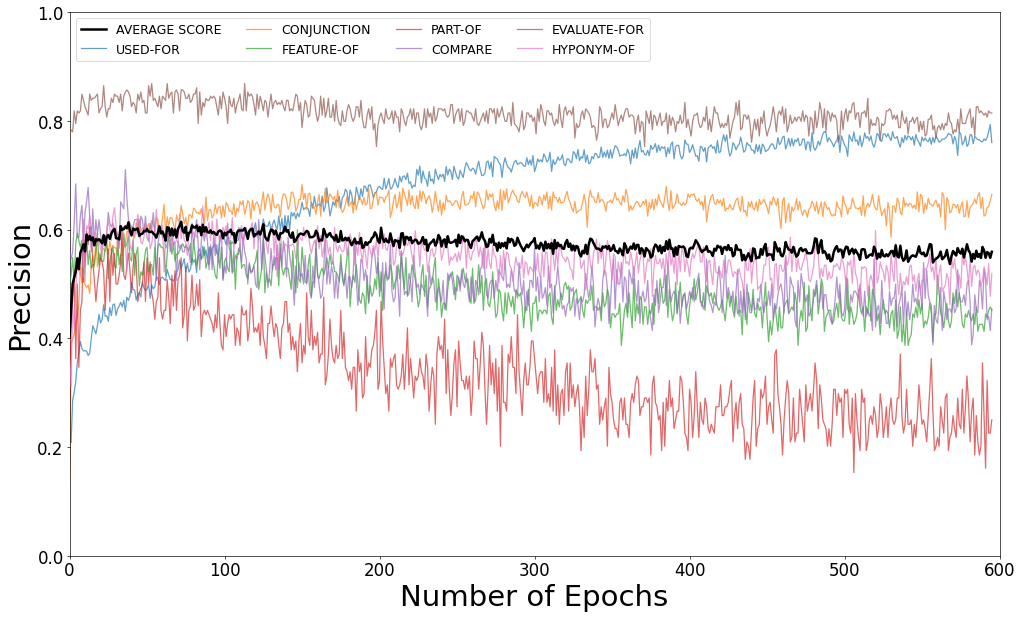

In [ ]:
plt.figure(figsize=(20, 12), dpi=60)
plt.plot(precision_avg,label='AVERAGE SCORE',color='black',linewidth=3,zorder=8)
plt.plot(precision_1,label='USED-FOR',alpha=0.7,zorder=1)
plt.plot(precision_2,label='CONJUNCTION',alpha=0.7,zorder=2)
plt.plot(precision_3,label='FEATURE-OF',alpha=0.7,zorder=3)
plt.plot(precision_4,label='PART-OF',alpha=0.7,zorder=4)
plt.plot(precision_5,label='COMPARE',alpha=0.7,zorder=5)
plt.plot(precision_6,label='EVALUATE-FOR',alpha=0.7,zorder=6)
plt.plot(precision_7,label='HYPONYM-OF',alpha=0.7,zorder=7)

plt.legend(ncol=4,loc='upper left',fontsize=15)
plt.xlim([0, 600])
plt.ylim([0, 1])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Number of Epochs', fontsize=35)
plt.ylabel('Precision', fontsize=35)
plt.savefig('precision.pdf')

In [ ]:
recall_1 = []
recall_2 = []
recall_3 = []
recall_4 = []
recall_5 = []
recall_6 = []
recall_7 = []
recall_avg = []

for i in range(len(store_recall)):
  recall_1.append(store_recall[i][0])
  recall_2.append(store_recall[i][1])
  recall_3.append(store_recall[i][2])
  recall_4.append(store_recall[i][3])
  recall_5.append(store_recall[i][4])
  recall_6.append(store_recall[i][5])
  recall_7.append(store_recall[i][6])
  recall_avg.append(
      (store_recall[i][0]+store_recall[i][1]+store_recall[i][2]+store_recall[i][3]+store_recall[i][4]+store_recall[i][5]+store_recall[i][6])*(1/7)
  )


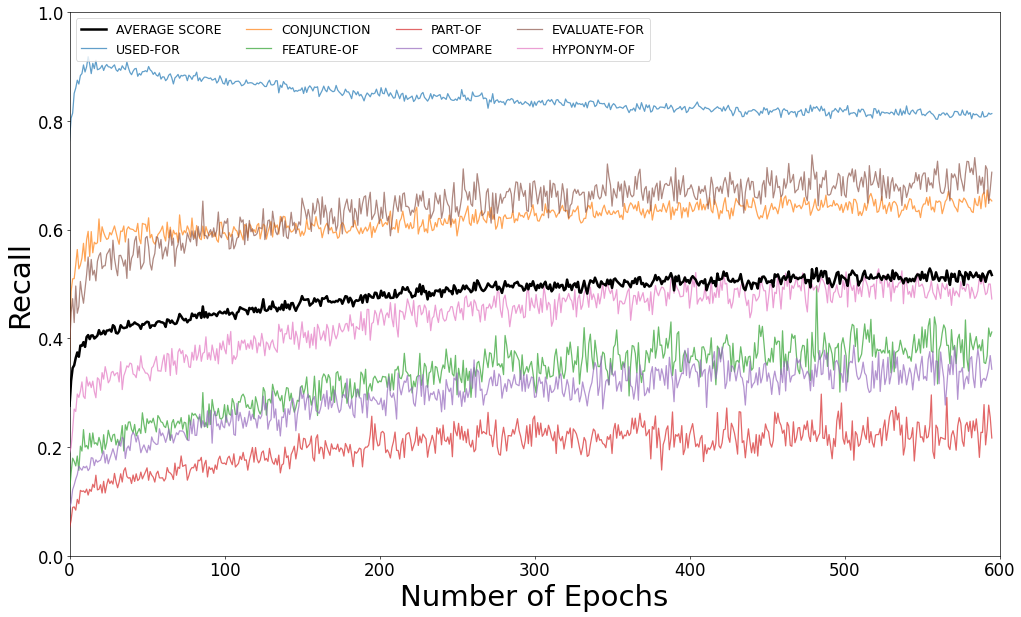

In [ ]:
plt.figure(figsize=(20, 12), dpi=60)
plt.plot(recall_avg,label='AVERAGE SCORE',color='black',linewidth=3,zorder=8)
plt.plot(recall_1,label='USED-FOR',alpha=0.7,zorder=1)
plt.plot(recall_2,label='CONJUNCTION',alpha=0.7,zorder=2)
plt.plot(recall_3,label='FEATURE-OF',alpha=0.7,zorder=3)
plt.plot(recall_4,label='PART-OF',alpha=0.7,zorder=4)
plt.plot(recall_5,label='COMPARE',alpha=0.7,zorder=5)
plt.plot(recall_6,label='EVALUATE-FOR',alpha=0.7,zorder=6)
plt.plot(recall_7,label='HYPONYM-OF',alpha=0.7,zorder=7)

plt.legend(ncol=4,loc='upper left',fontsize=15)
plt.xlim([0, 600])
plt.ylim([0, 1])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Number of Epochs', fontsize=35)
plt.ylabel('Recall', fontsize=35)
plt.savefig('recall.pdf')